In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
tf.reset_default_graph()


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 128)       36992     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale= 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_data = ImageDataGenerator(rescale= 1./255)


In [14]:
training_set = train_data.flow_from_directory(
    'idolimg/train/', target_size=(64,64), batch_size= 10, class_mode='categorical'
)

Found 210 images belonging to 3 classes.


In [15]:
test_set = test_data.flow_from_directory(
    'idolimg/test/', target_size=(64,64), batch_size= 10, class_mode='categorical'
)

Found 90 images belonging to 3 classes.


In [16]:
history = model.fit_generator(training_set, epochs=30, verbose= 1, validation_data= test_set)

C:\Users\Jeremy\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
21/21 [==============================] - 1s 47ms/step - loss: 1.1215 - accuracy: 0.2790 - val_loss: 1.0990 - val_accuracy: 0.3333
Epoch 2/30
21/21 [==============================] - 1s 38ms/step - loss: 1.0989 - accuracy: 0.2747 - val_loss: 1.0980 - val_accuracy: 0.3333
Epoch 3/30
21/21 [==============================] - 1s 37ms/step - loss: 1.0977 - accuracy: 0.3696 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 4/30
21/21 [==============================] - 1s 38ms/step - loss: 1.0997 - accuracy: 0.3219 - val_loss: 1.0968 - val_accuracy: 0.3444
Epoch 5/30
21/21 [==============================] - 1s 42ms/step - loss: 1.0976 - accuracy: 0.3494 - val_loss: 1.1044 - val_accuracy: 0.3333
Epoch 6/30
21/21 [==============================] - 1s 39ms/step - loss: 1.1014 - accuracy: 0.3517 - val_loss: 1.0972 - val_accuracy: 0.3778
Epoch 7/30
21/21 [==============================] - 1s 42ms/step - loss: 1.0977 - accuracy: 0.3712 - val_loss: 1.0955 - val_accuracy: 0.3333
Epoch 8/30
21

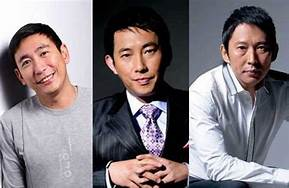

In [17]:
from PIL import Image
im = Image.open('idolimg/who.jpg')
im

In [18]:
from PIL import Image
import cv2 as cv

face_classifier = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")

img = cv.imread('idolimg/who.jpg')
faces =  face_classifier.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5)
faces


array([[107,  28,  63,  63],
       [  8,  35,  58,  58],
       [224,  26,  55,  55]], dtype=int32)

In [19]:
transform_dic = {
    'Chu_face' : 'Chu Chung-Heng' , 'Niu_face' : 'Niu Chen-Zer' , 'Sung_face' : 'Sung Shao-Ching'
}
name_dic = {v:transform_dic.get(k) for k, v in training_set.class_indices.items()}
name_dic

{0: 'Chu Chung-Heng', 1: 'Niu Chen-Zer', 2: 'Sung Shao-Ching'}

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

font = cv.FONT_HERSHEY_PLAIN

for x,y,w,h in faces:
    box = (x, y, x+w, y+h)
    crpim = im.crop(box).resize((64,64))
    target_image = image.img_to_array(crpim)
    target_image = np.expand_dims(target_image, axis=0)
    res = model.predict_classes(target_image)[0]
    cv.rectangle(img, (x,y), (x+w, y+h), (14,201,225), 2)
    cv.putText(img, name_dic.get(res), (x+int(w/6), y-10), font, 0.5, (14,201,255), 1)



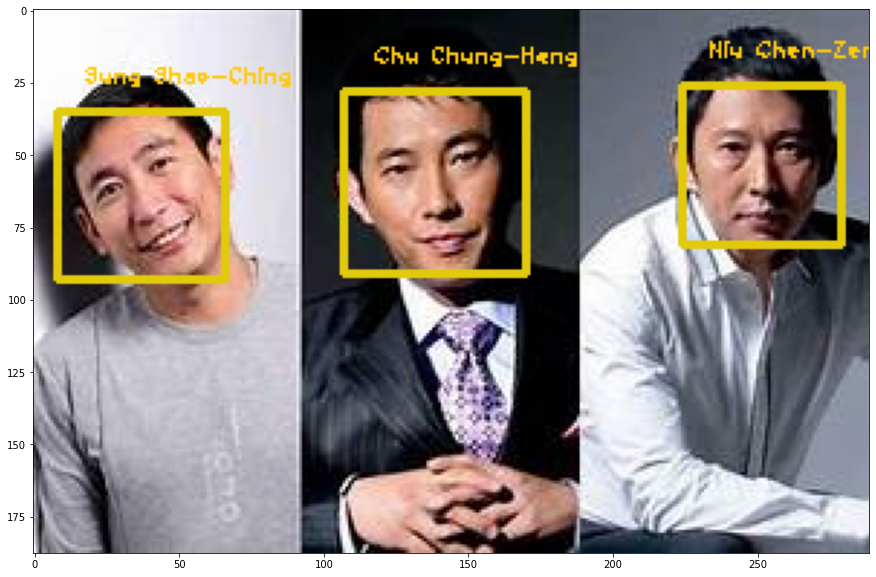

In [21]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
